<a href="https://colab.research.google.com/github/yellow2041/AutoDrawer/blob/master/WineClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [2]:
import keras

keras.__version__

Using TensorFlow backend.


'2.3.1'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LeakyReLU,ELU

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [5]:
import numpy as np
np.__version__

'1.18.4'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [0]:
#########################코드########################

white_wine=pd.read_csv("/gdrive/My Drive/winequality-white.csv")
red_wine=pd.read_csv("/gdrive/My Drive/winequality-red.csv")



#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [7]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [0]:
#####################################################
def generate_data(df, t_r):

    df=df.sample(frac=1)
    i=len(df)
    ratio=int(i*t_r),i
    train=df.iloc[:ratio[0],]
    test=df.iloc[ratio[0]:ratio[1],]

    X_train,Y_train=train.iloc[:,:-1],train.values[:,-1]
    X_test,Y_test=test.iloc[:,:-1],test.values[:,-1]

    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [43]:
generate_data(white_wine, 0.7)

(array([[ 6.9 ,  0.29,  0.41, ...,  3.12,  0.51,  9.6 ],
        [ 5.1 ,  0.33,  0.22, ...,  3.51,  0.38, 12.5 ],
        [ 7.1 ,  0.3 ,  0.46, ...,  3.12,  0.54, 12.7 ],
        ...,
        [ 6.6 ,  0.38,  0.29, ...,  3.04,  0.37, 12.5 ],
        [ 6.8 ,  0.23,  0.29, ...,  3.35,  0.52,  9.8 ],
        [ 7.5 ,  0.24,  0.31, ...,  3.05,  0.53,  9.1 ]]),
 array([5., 7., 6., ..., 6., 6., 6.]),
 array([[ 8.4 ,  0.22,  0.3 , ...,  3.13,  0.54, 10.8 ],
        [ 7.3 ,  0.25,  0.29, ...,  3.43,  0.38,  9.6 ],
        [ 6.  ,  0.32,  0.46, ...,  3.24,  0.49,  9.6 ],
        ...,
        [ 7.5 ,  0.22,  0.32, ...,  3.08,  0.6 , 11.3 ],
        [ 5.9 ,  0.26,  0.25, ...,  3.33,  0.43,  9.4 ],
        [ 9.2 ,  0.35,  0.39, ...,  2.96,  0.28, 10.4 ]]),
 array([7., 5., 5., ..., 7., 5., 4.]))

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [304]:
##########################################################

model=Sequential()
model.add(Dense(13,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='sigmoid'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

model.summary()
score=model.evaluate(x_test,y_test)
print(score)

###########################################################

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 0s 58us/step - loss: 1.9784 - accuracy: 0.0029 - val_loss: 1.7196 - val_accuracy: 0.0068
Epoch 2/100
3428/3428 [==============================] - 0s 26us/step - loss: 1.7025 - accuracy: 0.0041 - val_loss: 1.7244 - val_accuracy: 0.0082
Epoch 3/100
3428/3428 [==============================] - 0s 25us/step - loss: 1.7004 - accuracy: 0.0055 - val_loss: 1.7204 - val_accuracy: 0.0102
Epoch 4/100
3428/3428 [==============================] - 0s 24us/step - loss: 1.6761 - accuracy: 0.0061 - val_loss: 1.6276 - val_accuracy: 0.0102
Epoch 5/100
3428/3428 [==============================] - 0s 24us/step - loss: 1.5937 - accuracy: 0.0067 - val_loss: 1.6146 - val_accuracy: 0.0109
Epoch 6/100
3428/3428 [==============================] - 0s 24us/step - loss: 1.5816 - accuracy: 0.0099 - val_loss: 1.6063 - val_accuracy: 0.0238
Epoch 7/100
3428/3428 [==============================] - 0s 25us/step - loss

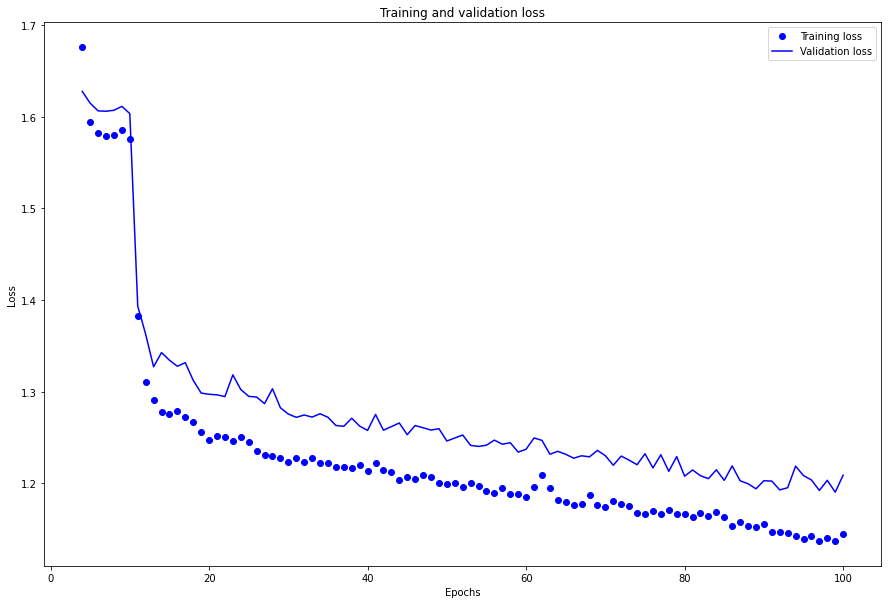

<Figure size 432x288 with 0 Axes>

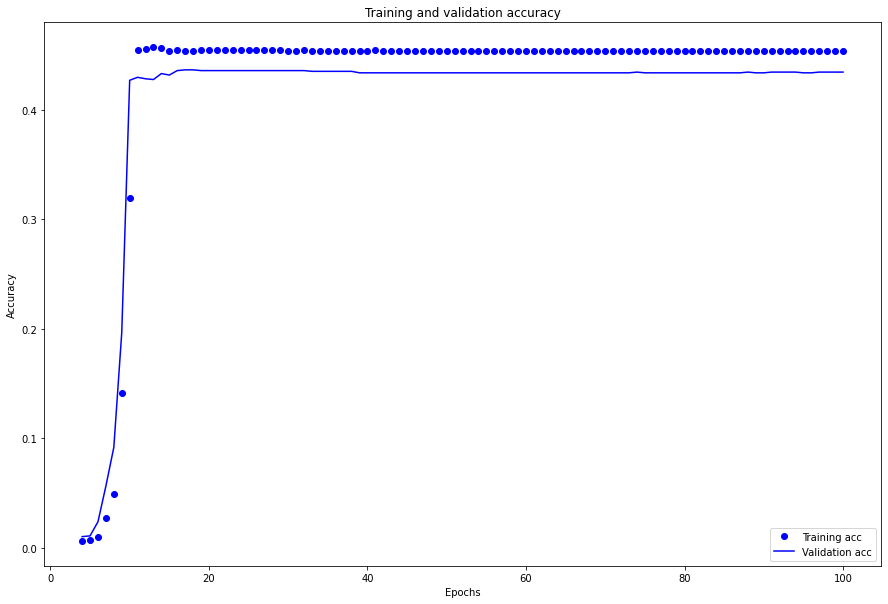

In [305]:
import matplotlib.pyplot as plt

history_dict=hist.history
loss=history_dict['loss'][3:]
val_loss=history_dict['val_loss'][3:]

epochs=range(4, len(loss)+4)

plt.figure(figsize=(15, 10))
plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc=history_dict['accuracy'][3:]
val_acc=history_dict['val_accuracy'][3:]

plt.figure(figsize=(15, 10))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
x_train_r, y_train_r, x_test_r, y_test_r = generate_data(red_wine, 0.7)

In [307]:
##########################################################

model_r=Sequential()
model_r.add(Dense(13,activation='relu',input_dim=11))
model_r.add(Dense(32,activation='relu'))
model_r.add(Dense(11,activation='sigmoid'))


model_r.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist_r=model_r.fit(x_train_r,y_train_r,epochs=100,batch_size=128,validation_data=(x_test_r,y_test_r))

model_r.summary()
score=model_r.evaluate(x_test_r,y_test_r)
print(score)

###########################################################

Train on 1119 samples, validate on 480 samples
Epoch 1/100
1119/1119 [==============================] - 0s 129us/step - loss: 8.3395 - accuracy: 0.0063 - val_loss: 8.1196 - val_accuracy: 0.0000e+00
Epoch 2/100
1119/1119 [==============================] - 0s 33us/step - loss: 7.5051 - accuracy: 0.0063 - val_loss: 7.5929 - val_accuracy: 0.0000e+00
Epoch 3/100
1119/1119 [==============================] - 0s 34us/step - loss: 6.8223 - accuracy: 0.0063 - val_loss: 6.5887 - val_accuracy: 0.0000e+00
Epoch 4/100
1119/1119 [==============================] - 0s 32us/step - loss: 5.5164 - accuracy: 0.0089 - val_loss: 4.8412 - val_accuracy: 0.0063
Epoch 5/100
1119/1119 [==============================] - 0s 33us/step - loss: 3.6300 - accuracy: 0.0268 - val_loss: 2.7079 - val_accuracy: 0.0500
Epoch 6/100
1119/1119 [==============================] - 0s 33us/step - loss: 2.1577 - accuracy: 0.0920 - val_loss: 1.9330 - val_accuracy: 0.1063
Epoch 7/100
1119/1119 [==============================] - 0s 41us

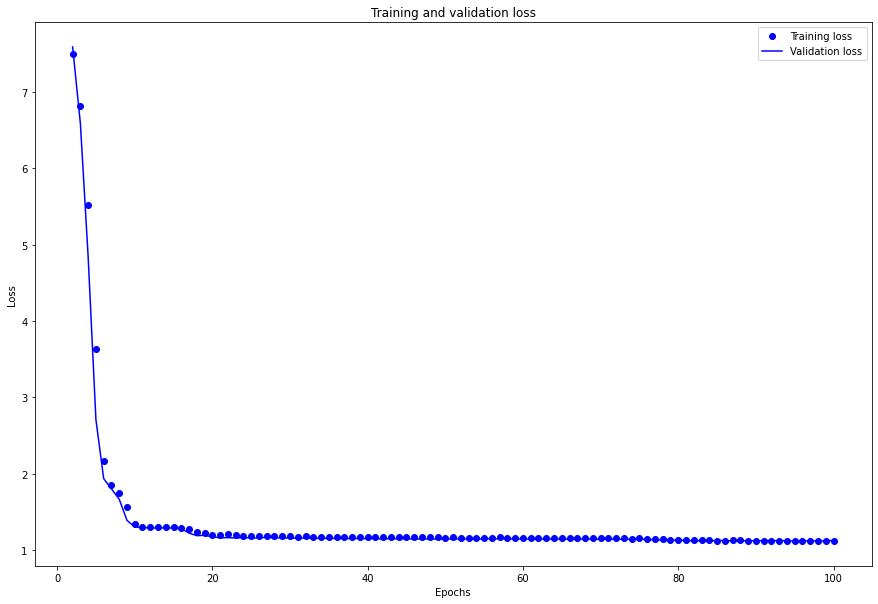

<Figure size 432x288 with 0 Axes>

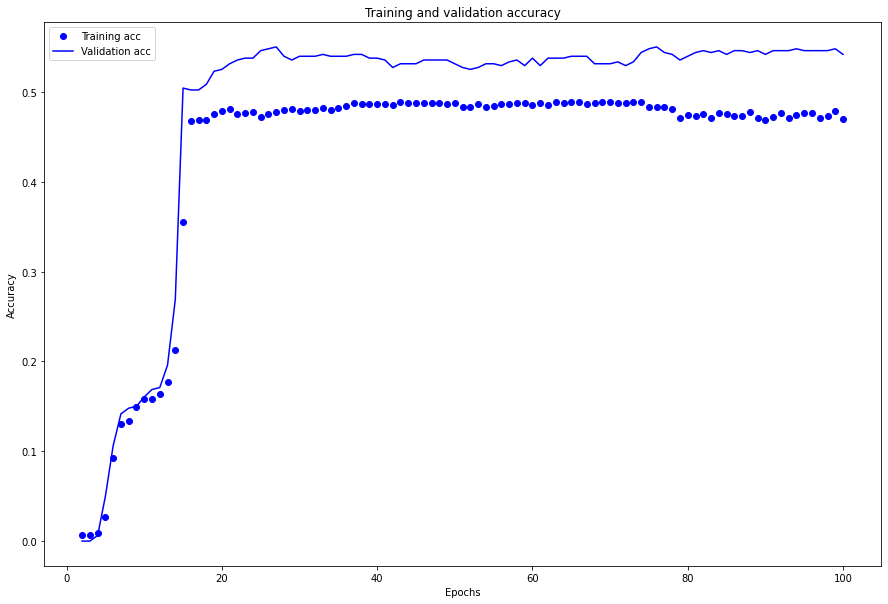

In [308]:

history_dict=hist_r.history
loss=history_dict['loss'][1:]
val_loss=history_dict['val_loss'][1:]

epochs=range(2, len(loss)+2)

plt.figure(figsize=(15, 10))
plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc=history_dict['accuracy'][1:]
val_acc=history_dict['val_accuracy'][1:]

plt.figure(figsize=(15, 10))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [272]:
##########################################################

model2=Sequential()
model2.add(Dense(13,activation='relu',input_dim=11))
model2.add(LeakyReLU(alpha=0.3))
model2.add(Dense(32,activation='relu'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(ELU(alpha=1.0))
model2.add(LeakyReLU(alpha=0.3))
model2.add(Dense(11,activation='softmax'))


model2.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist=model2.fit(x_train,y_train,epochs=200,batch_size=64,validation_data=(x_test,y_test))

model2.summary()
score=model2.evaluate(x_test,y_test)
print(score)

###########################################################

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 0s 81us/step - loss: 5.3483 - accuracy: 0.2917 - val_loss: 1.4833 - val_accuracy: 0.4122
Epoch 2/200
3428/3428 [==============================] - 0s 54us/step - loss: 1.3502 - accuracy: 0.4457 - val_loss: 1.3521 - val_accuracy: 0.4354
Epoch 3/200
3428/3428 [==============================] - 0s 53us/step - loss: 1.2788 - accuracy: 0.4519 - val_loss: 1.3090 - val_accuracy: 0.4605
Epoch 4/200
3428/3428 [==============================] - 0s 52us/step - loss: 1.2551 - accuracy: 0.4536 - val_loss: 1.2835 - val_accuracy: 0.4272
Epoch 5/200
3428/3428 [==============================] - 0s 51us/step - loss: 1.2385 - accuracy: 0.4513 - val_loss: 1.2934 - val_accuracy: 0.4238
Epoch 6/200
3428/3428 [==============================] - 0s 51us/step - loss: 1.2438 - accuracy: 0.4495 - val_loss: 1.3706 - val_accuracy: 0.4367
Epoch 7/200
3428/3428 [==============================] - 0s 50us/step - loss

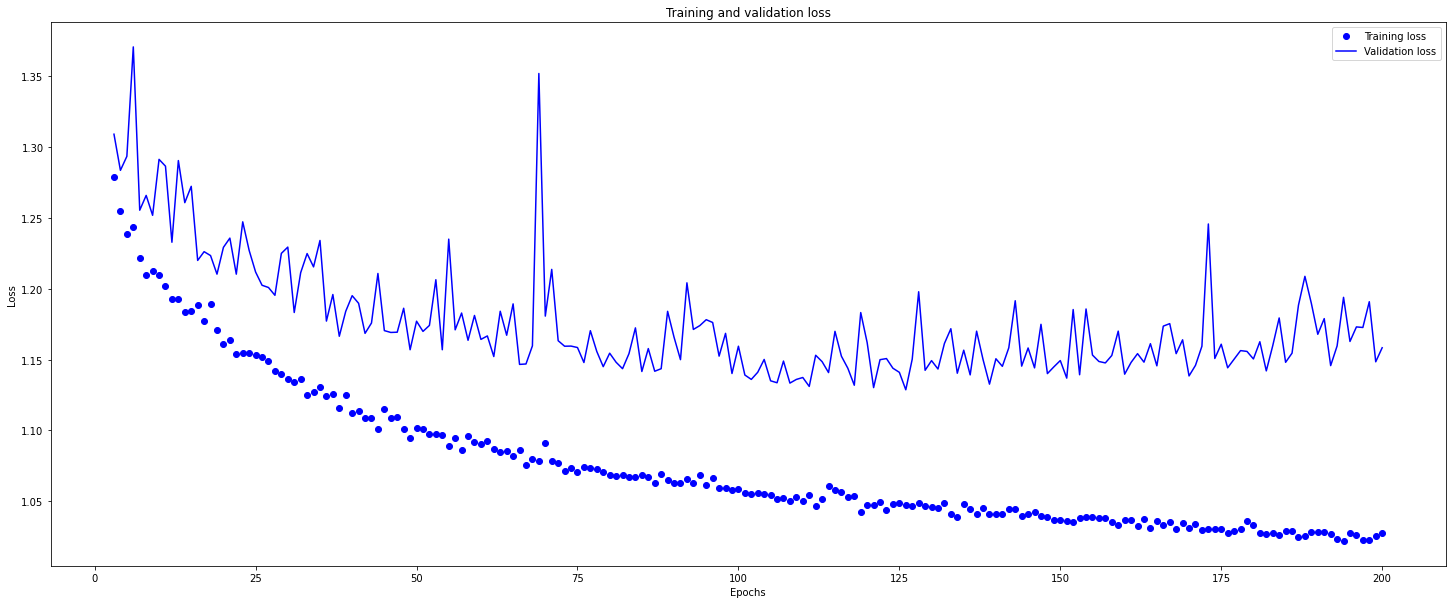

<Figure size 432x288 with 0 Axes>

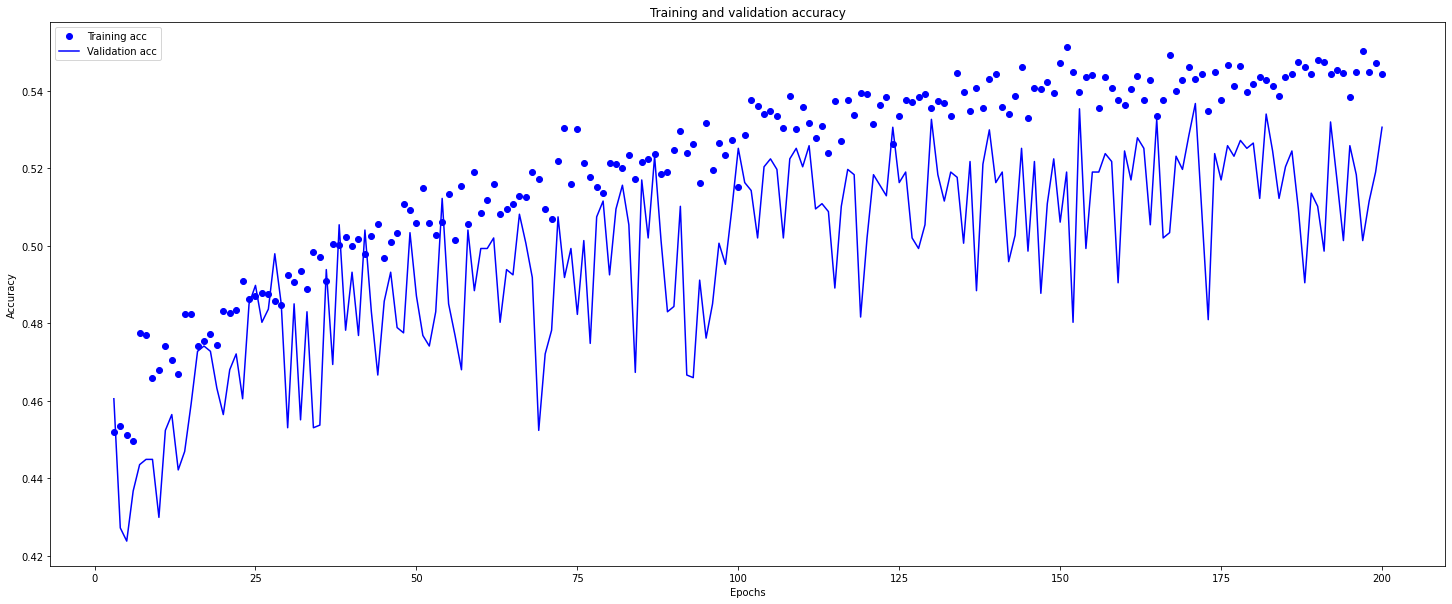

In [273]:
history_dict=hist.history
loss=history_dict['loss'][2:]
val_loss=history_dict['val_loss'][2:]

epochs=range(3, len(loss)+3)

plt.figure(figsize=(25, 10))
plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc=history_dict['accuracy'][2:]
val_acc=history_dict['val_accuracy'][2:]

plt.figure(figsize=(25, 10))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [283]:
##########################################################


model_r2=Sequential()
model_r2.add(Dense(13,activation='relu',input_dim=11))
model_r2.add(LeakyReLU(alpha=0.3))
model_r2.add(Dense(32,activation='relu'))
model_r2.add(ELU(alpha=1.0))
#model.add(LeakyReLU(alpha=0.1))
model_r2.add(LeakyReLU(alpha=0.3))
model_r2.add(Dense(11,activation='softmax'))


model_r2.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist=model_r2.fit(x_train_r,y_train_r,epochs=300,batch_size=64,validation_data=(x_test_r,y_test_r))

model_r2.summary()
score=model_r2.evaluate(x_test_r,y_test_r)
print(score)

###########################################################

Train on 1119 samples, validate on 480 samples
Epoch 1/300
1119/1119 [==============================] - 0s 175us/step - loss: 5.9949 - accuracy: 0.2395 - val_loss: 1.9621 - val_accuracy: 0.4521
Epoch 2/300
1119/1119 [==============================] - 0s 71us/step - loss: 1.6201 - accuracy: 0.4540 - val_loss: 1.3668 - val_accuracy: 0.4771
Epoch 3/300
1119/1119 [==============================] - 0s 68us/step - loss: 1.3515 - accuracy: 0.4558 - val_loss: 1.3168 - val_accuracy: 0.4583
Epoch 4/300
1119/1119 [==============================] - 0s 66us/step - loss: 1.2600 - accuracy: 0.4665 - val_loss: 1.2079 - val_accuracy: 0.4896
Epoch 5/300
1119/1119 [==============================] - 0s 72us/step - loss: 1.2276 - accuracy: 0.4727 - val_loss: 1.2117 - val_accuracy: 0.4979
Epoch 6/300
1119/1119 [==============================] - 0s 76us/step - loss: 1.2116 - accuracy: 0.4701 - val_loss: 1.1660 - val_accuracy: 0.4917
Epoch 7/300
1119/1119 [==============================] - 0s 68us/step - loss

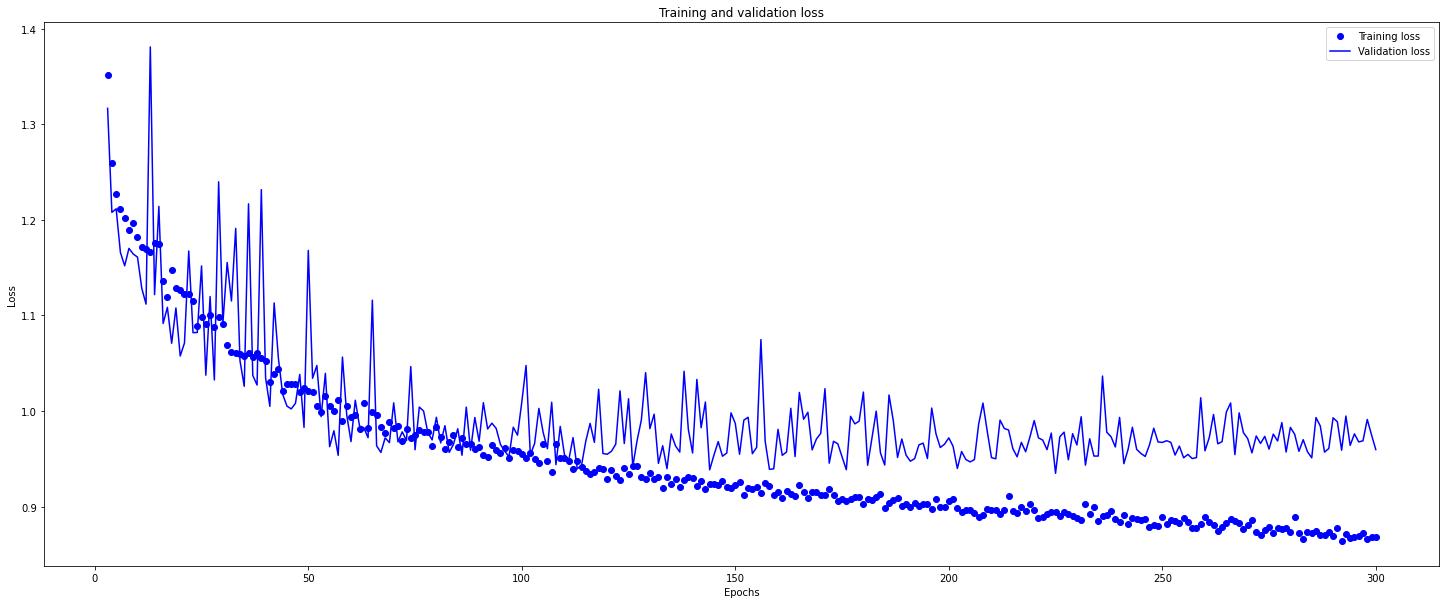

<Figure size 432x288 with 0 Axes>

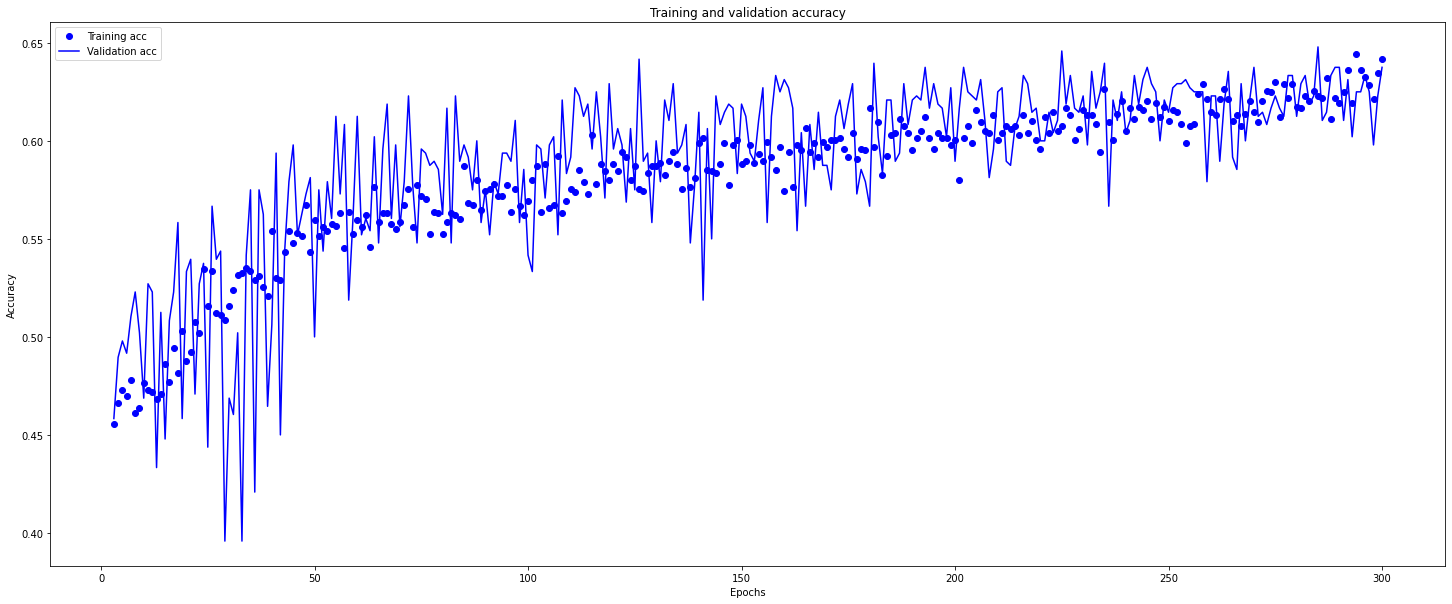

In [284]:
history_dict=hist.history
loss=history_dict['loss'][2:]
val_loss=history_dict['val_loss'][2:]

epochs=range(3, len(loss)+3)

plt.figure(figsize=(25, 10))
plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc=history_dict['accuracy'][2:]
val_acc=history_dict['val_accuracy'][2:]

plt.figure(figsize=(25, 10))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [324]:
##########################################################

wine = pd.concat([white_wine,red_wine])
x_train_w, y_train_w, x_test_w, y_test_w = generate_data(wine, 0.7)

model_w=Sequential()
model_w.add(Dense(13,activation='relu',input_dim=11))
model_w.add(LeakyReLU(alpha=0.3))
model_w.add(Dense(32,activation='relu'))
model_w.add(LeakyReLU(alpha=0.1))
model_w.add(ELU(alpha=1.0))
model_w.add(Dense(32,activation='relu'))
model_w.add(LeakyReLU(alpha=0.3))
model_w.add(Dense(11,activation='softmax'))


model_w.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist=model_w.fit(x_train_w,y_train_w,epochs=150,batch_size=64,validation_data=(x_test_w,y_test_w))

model_w.summary()
score=model_w.evaluate(x_test_w,y_test_w)
print(score)


###########################################################

Train on 4547 samples, validate on 1950 samples
Epoch 1/150
4547/4547 [==============================] - 0s 107us/step - loss: 3.1801 - accuracy: 0.3424 - val_loss: 2.0084 - val_accuracy: 0.1979
Epoch 2/150
4547/4547 [==============================] - 0s 60us/step - loss: 1.3061 - accuracy: 0.4176 - val_loss: 1.6676 - val_accuracy: 0.4205
Epoch 3/150
4547/4547 [==============================] - 0s 59us/step - loss: 1.2705 - accuracy: 0.4346 - val_loss: 2.4534 - val_accuracy: 0.1051
Epoch 4/150
4547/4547 [==============================] - 0s 60us/step - loss: 1.2671 - accuracy: 0.4333 - val_loss: 2.0915 - val_accuracy: 0.3062
Epoch 5/150
4547/4547 [==============================] - 0s 63us/step - loss: 1.2617 - accuracy: 0.4330 - val_loss: 1.7925 - val_accuracy: 0.2021
Epoch 6/150
4547/4547 [==============================] - 0s 57us/step - loss: 1.2363 - accuracy: 0.4504 - val_loss: 1.4611 - val_accuracy: 0.4123
Epoch 7/150
4547/4547 [==============================] - 0s 59us/step - los

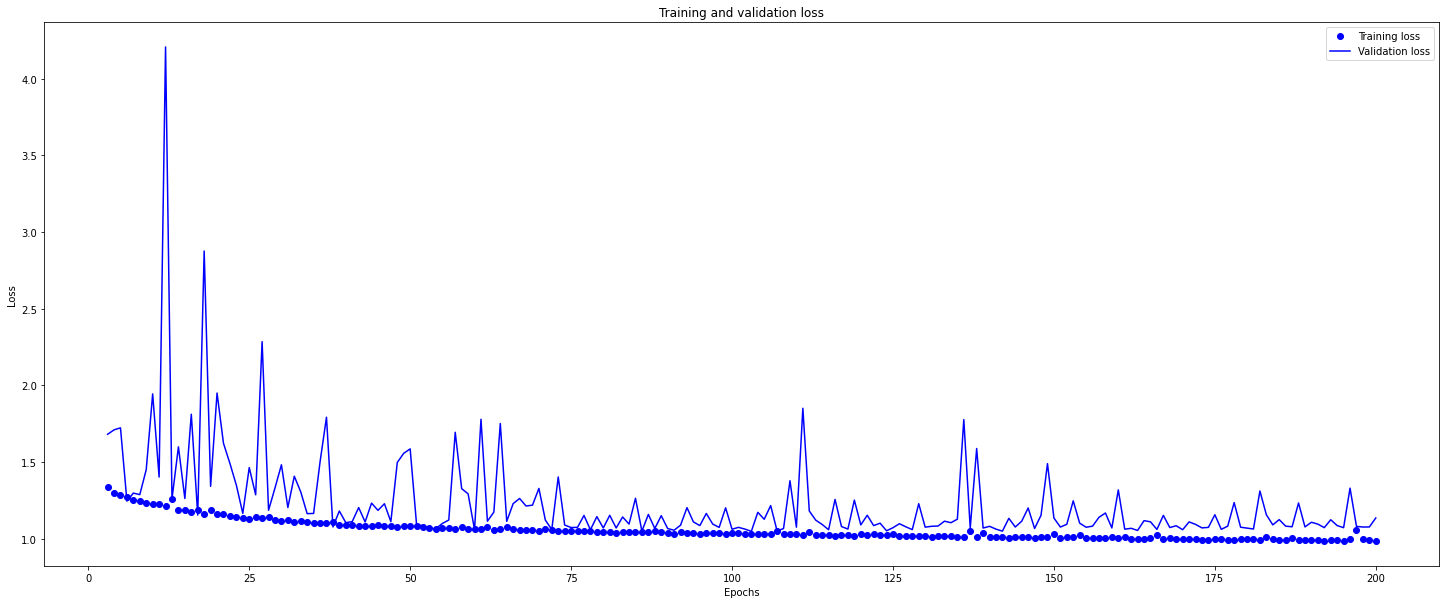

<Figure size 432x288 with 0 Axes>

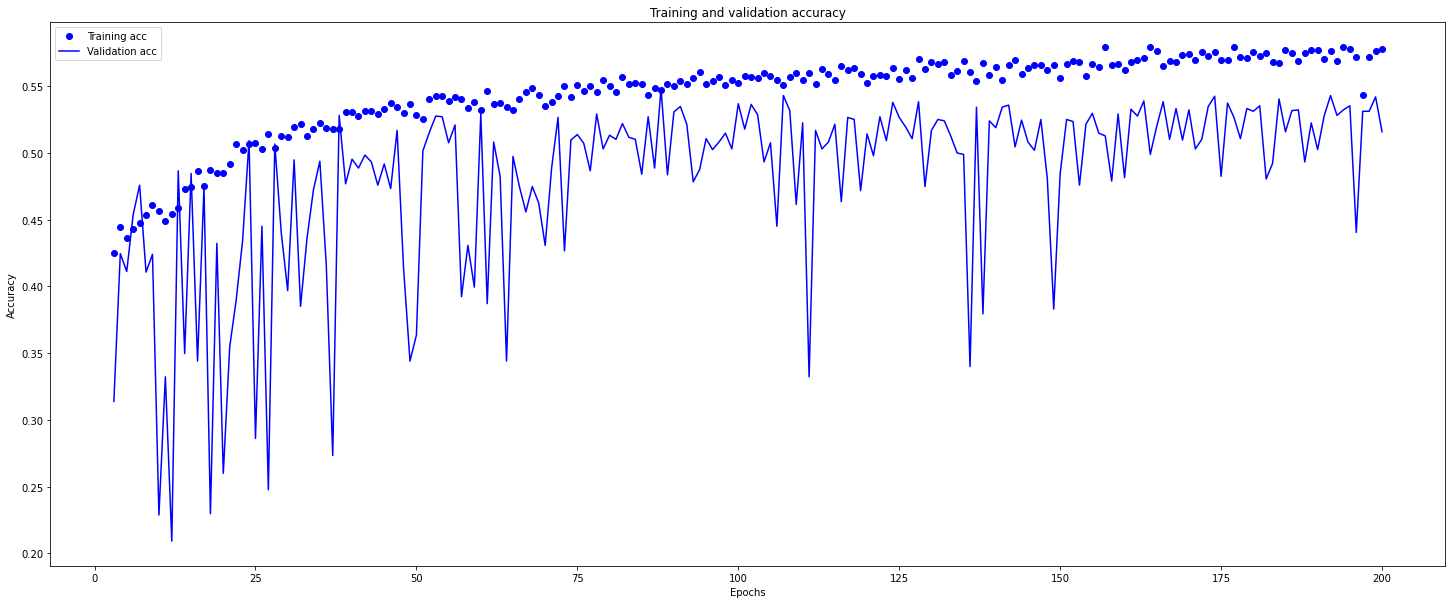

In [323]:
history_dict=hist.history
loss=history_dict['loss'][2:]
val_loss=history_dict['val_loss'][2:]

epochs=range(3, len(loss)+3)

plt.figure(figsize=(25, 10))
plt.plot(epochs, loss ,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc=history_dict['accuracy'][2:]
val_acc=history_dict['val_accuracy'][2:]

plt.figure(figsize=(25, 10))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()